In [20]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

Define degree and weight list generators.

In [21]:
#generate random weight
def ran_weight(l, min, max):
    #l: length of the list
    #max/min: max/min of the list element
    randomlist = []
    for i in range(l):
        n = random.randint(min,max)
        randomlist.append(n)

    return randomlist

#generate random degree for simple connected diagram
def ran_deg(l, min=1 , max=None):
    #l: length
    #max/min: max/min of the degree
    max-=1
    list = []
    for i in range(l):
        n = random.randint(min,max)
        list.append(n)
    
    if sum(list)%2 != 0:
        k = int(random.random()*l)
        if list[k] == 1:       
            list[k] = list[k] + 1
        else:
            list[k] = list[k] - 1
    
    return list

Example for a random graph.

degree= [1, 2, 6, 3, 5, 2, 6, 2, 4, 3]
weight= [5, 4, 1, 4, 6, 4, 9, 1, 1, 3]
graph degree sequence [(0, 1), (1, 2), (2, 6), (3, 3), (4, 5), (5, 2), (6, 6), (7, 2), (8, 4), (9, 3)]


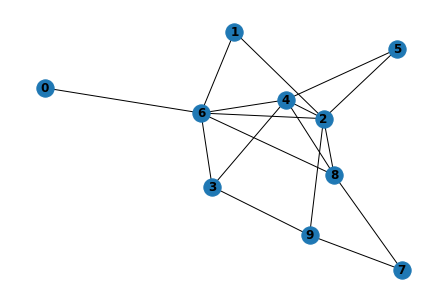

In [22]:
from Gphase import Gphase

length = 10
d_min = 2 #minimal degree, not suggested to be 1 for small d_max
d_max = 7 #maximal degree, where d_max < length, d_max not suggested to be small
w_min = 1 
w_max = 10

degree = ran_deg(length, d_min, d_max)
weight = ran_weight(length, w_min, w_max)

print('degree=', degree)
print('weight=', weight)


GP = Gphase(degree, weight)
G = GP.random_graph_gen()
nx.draw(G, with_labels=True, font_weight='bold')
print('graph degree sequence', G.degree())

Plot phase diagram.

transition points are [0.4  0.8  0.96 2.   2.4 ]


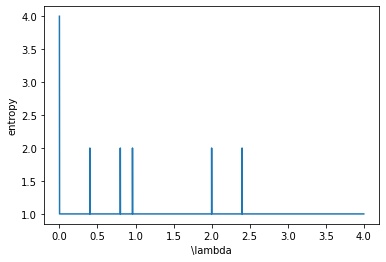

In [23]:
max_lamb = 4
lam_list, chi_list = GP.var_phase('repeat',max_lamb)

plt.plot(lam_list, chi_list)
plt.xlabel('\lambda')
plt.ylabel('entropy')

m_index = GP.transition(chi_list)
print('transition points are', m_index)

Reduced weight lists for chosen lambdas. You can do manual verification using this.

In [24]:
l_chosen, w_red = GP.verify_list(m_index, lam_list)

print('choose lambda at', l_chosen)
print('reduced weight', w_red)

choose lambda at [0.2, 0.6000000000000001, 0.88, 1.48, 2.2, 3.1995]
reduced weight [array([-0.46363636, -0.25909091,  0.53636364, -0.07727273,  0.24090909,
       -0.25909091,  0.35454545, -0.19090909,  0.17272727, -0.05454545]), array([-0.43846154, -0.22692308,  0.56153846, -0.07307692,  0.11923077,
       -0.22692308,  0.1       , -0.05384615,  0.25384615, -0.01538462]), array([-0.425     , -0.20972222,  0.575     , -0.07083333,  0.05416667,
       -0.20972222, -0.03611111,  0.01944444,  0.29722222,  0.00555556]), array([-0.40344828, -0.18218391,  0.59655172, -0.06724138, -0.05      ,
       -0.18218391, -0.25402299,  0.13678161,  0.36666667,  0.03908046]), array([-0.36818182, -0.15227273,  0.58636364, -0.06136364, -0.12954545,
       -0.15227273, -0.41363636,  0.22272727,  0.40454545,  0.06363636]), array([-0.30002344, -0.11251367,  0.51252539, -0.05000391, -0.17498437,
       -0.11251367, -0.48747461,  0.26248633,  0.38750586,  0.07499609])]


Calculate maximum weight by calcuating for every lambda.

In [25]:
w_tot_list = []
L_list = []

for w_reduced in w_red:
    I, w_tot = GP.total_weight(G, w_reduced, weight)
    L_list.append(I)
    w_tot_list.append(w_tot)

max_index = w_tot_list.index(max(w_tot_list))
print('all calculated weights', w_tot_list)
print('maximum weight is ', max(w_tot_list))
print('chosen nodes are', L_list[max_index])

all calculated weights [18, 18, 18, 18, 16, 16]
maximum weight is  18
chosen nodes are [0, 1, 5, 7, 3]


Plot real phase diagram (for small graph).

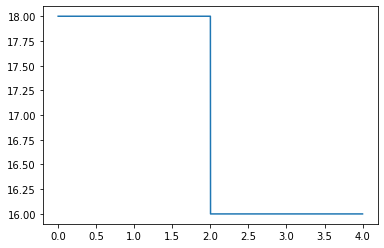

In [26]:
w_list = GP.phase_all(G, lam_list)
plt.plot(lam_list, w_list)

In [27]:
real_transitions = find_peaks(np.diff(w_list))[0]/1000
print(real_transitions)


[]


Check if it is in the pervious set of transition points.

In [28]:
real_transitions = [round(i,2) for i in real_transitions]
m_index = [round(i,2) for i in m_index]
for i in real_transitions:
    if i in m_index:
        print(True)
    else:
        print(i, 'is not a transtion.')